# Testing NeuPy with Iris dataset

### Loading modules

In [1]:
%matplotlib inline
from matplotlib.pyplot import plot
import numpy as np
import random

from neupy import environment, algorithms, layers, plots
from neupy.exceptions import StopTraining

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import theano


theano.config.floatX = 'float32'

environment.reproducible()

### Loading **iris** dataset

In [2]:
iris = datasets.load_iris()
data, target = iris.data, iris.target

### Normalizing the dataset

In [3]:
data_scaler = StandardScaler()
data_normalized = data_scaler.fit_transform(data)

target_scaler = OneHotEncoder()
target_normalized = target_scaler.fit_transform(target.reshape((-1, 1))).todense()

### Separating the dataset into train and test

In [4]:
data_train, data_test, target_train, target_test = train_test_split(
    data_normalized,
    target_normalized,
    train_size=(6 / 7)
)

### Creating the network

In [5]:
def check_goal(goal):
    def callback(net):
        if net.errors.last() < goal:
            raise StopTraining("Goal reached")

    return callback

net = algorithms.MinibatchGradientDescent(
    [
        layers.Input(4),
        layers.Tanh(10),
        layers.Tanh(3),
    ],
    verbose=True,
    show_epoch=1200,
    epoch_end_signal=check_goal(0.01),
)


Main information

[ALGORITHM] MinibatchGradientDescent

[OPTION] batch_size = 128
[OPTION] verbose = True
[OPTION] epoch_end_signal = callback
[OPTION] show_epoch = 1200
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.00 seconds


In [6]:
net.architecture()


Network's architecture

-----------------------------------------------
| # | Input shape | Layer Type | Output shape |
-----------------------------------------------
| 1 | 4           | Input      | 4            |
| 2 | 4           | Tanh       | 10           |
| 3 | 10          | Tanh       | 3            |
-----------------------------------------------



### Let's Train! :)

In [7]:
net.train(data_train, target_train, data_test, target_test, epochs=10000)


Start training

[TRAINING DATA] shapes: (128, 4)
[TEST DATA] shapes: (22, 4)
[TRAINING] Total epochs: 10000

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 0.92      | 0.7772    | 1 ms       |
| 1200    | 0.02293   | 0.0276    | 0 ms       |
| 2400    | 0.01915   | 0.01899   | 0 ms       |
| 3600    | 0.01773   | 0.01547   | 0 ms       |
| 4800    | 0.0168    | 0.01313   | 0 ms       |
| 6000    | 0.01612   | 0.01134   | 0 ms       |
| 7200    | 0.01558   | 0.009904  | 0 ms       |
| 8400    | 0.01515   | 0.008745  | 0 ms       |
| 9600    | 0.01478   | 0.007796  | 0 ms       |
| 10000   | 0.01467   | 0.007519  | 0 ms       |
------------------------------------------------



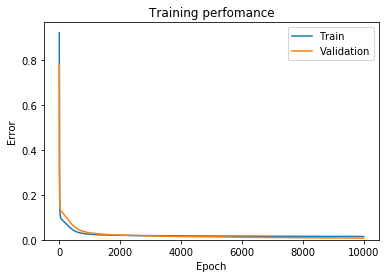

In [8]:
plots.error_plot(net)

### Now we can test the network

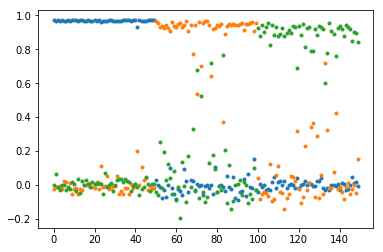

In [9]:
predicted = net.predict(data_normalized)
predicted_classes = np.asarray(predicted.argmax(axis=1)).reshape(-1)

plot(predicted, '.')

In [10]:
metrics.confusion_matrix(target, predicted_classes)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [11]:
print(metrics.classification_report(target, predicted_classes))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.94      0.96        50
          2       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       150



In [12]:
score = metrics.accuracy_score(target, predicted_classes)
"Validation accuracy: {:.2%}".format(score)

'Validation accuracy: 97.33%'